In [1]:
exec(open("dynamic.py").read(), globals())

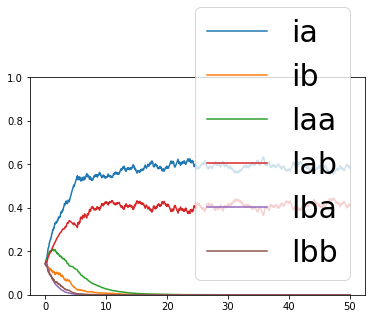

In [2]:
h = 2
l = 0.5
alpha = 0.4
c = 0.3

D = Dynamic(h=h, l=l, alpha=alpha, c=c, tFinal=50)
D.initialisation()
D.eulerEx()
D.plot()
plt.show()

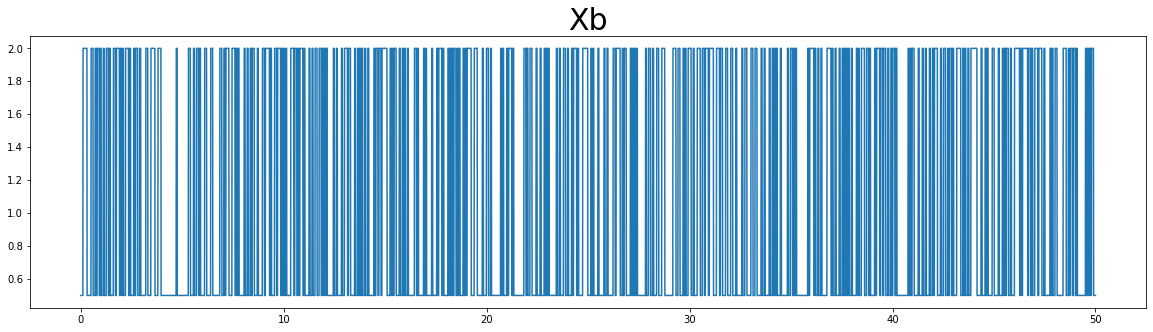

In [3]:
D.plot_Xb()

## Check $\delta$

Here we want to check if the ratio $\delta = \frac{1}{1+\alpha h+(1-\alpha)l}$ used in the model "simplified" make sense

###### alpha

###### c

### Generic

In [4]:
alpha_default = 0.5
h_default = 2.
l_default = 0.1
c_default = 2.
Param = ["alpha", "c", "l", "h"]
dic_default = {"alpha":alpha_default, "h":h_default, "l":l_default, "c":c_default}

In [5]:
Range = [np.linspace(0, 1, 101),
        np.linspace(0, 10, 101),
        np.linspace(0, 10, 101),
        np.linspace(0, 10, 101)]

In [6]:
#Delta_theoretical[i] = 1./(1+alpha*h+(1-alpha)*l)
Delta_theoretical = [[]]*4
Delta_theoretical[0] = 1./(1+Range[0]*h+(1-Range[0])*l)
Delta_theoretical[1] = 1./(1+alpha*Range[1]+(1-alpha)*l)
Delta_theoretical[2] = 1./(1+alpha*h+(1-alpha)*Range[2])
Delta_theoretical[3] = [1./(1+alpha*h+(1-alpha)*l)] * len(Range[3])

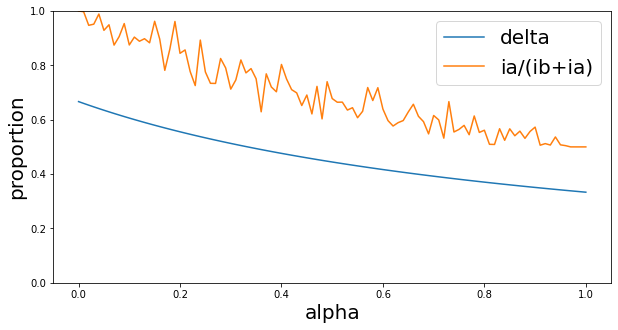

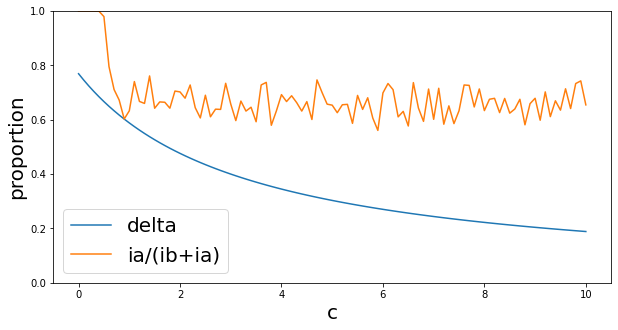

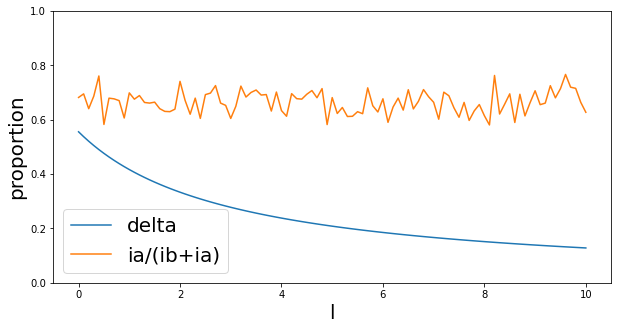

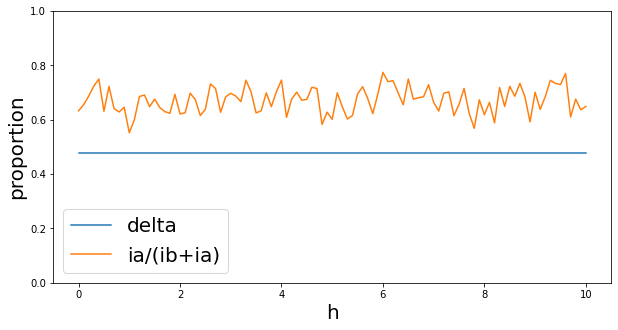

In [7]:
for i, param in enumerate(Param):
    Ratio = np.zeros_like(Range[i])
    for j, value in enumerate(Range[i]):
        dic = dic_default.copy()
        dic[param] = value
        #print(dic)
        D = Dynamic(**dic, model="complete", tFinal=50)
        D.initialisation()
        D.eulerEx()
        Ratio[j] = D.XX[-1][0] / (D.XX[-1][0]+D.XX[-1][1])
        
    plt.figure(figsize = (10, 5))
    plt.plot(Range[i], Delta_theoretical[i], label = "delta")
    plt.plot(Range[i], Ratio, label = "ia/(ib+ia)")
    plt.legend(fontsize = 20)
    plt.xlabel(param, fontsize = "20")
    plt.ylabel("proportion", fontsize = "20")
    plt.ylim(0,1)
    plt.show()

### Check link between the two model

In [8]:
alpha_default = 0.5
h_default = 5.
l_default = 0.5
c_default = .5
Param = ["alpha", "c", "l", "h"]
dic_default = {"alpha":alpha_default, "h":h_default, "l":l_default, "c":c_default}

In [9]:
Range = [np.linspace(0, 1, 101),
        np.logspace(np.log10(0.1), np.log10(10), 101),
        np.logspace(np.log10(0.1), np.log10(10), 101),
        np.logspace(np.log10(0.1), np.log10(10), 101)]

<string>:100: RuntimeWarning: invalid value encountered in double_scalars
<string>:91: RuntimeWarning: invalid value encountered in true_divide
<string>:93: RuntimeWarning: invalid value encountered in true_divide


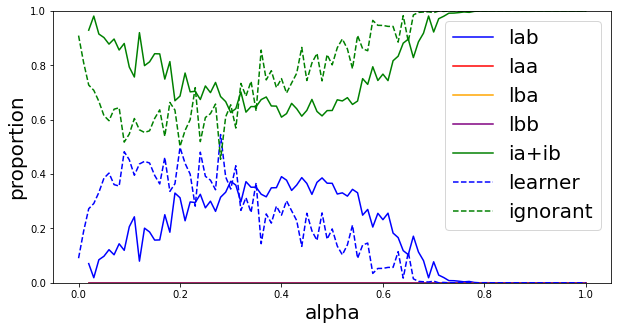

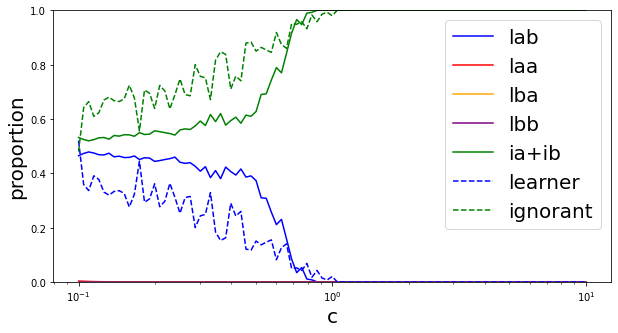

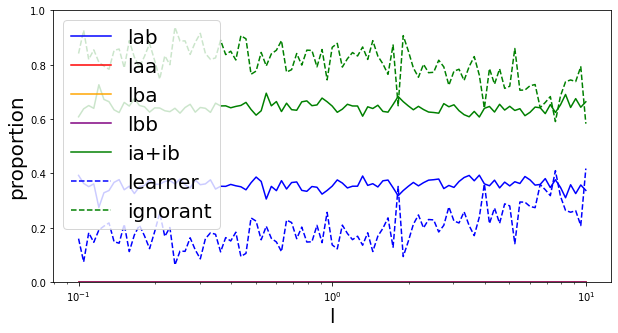

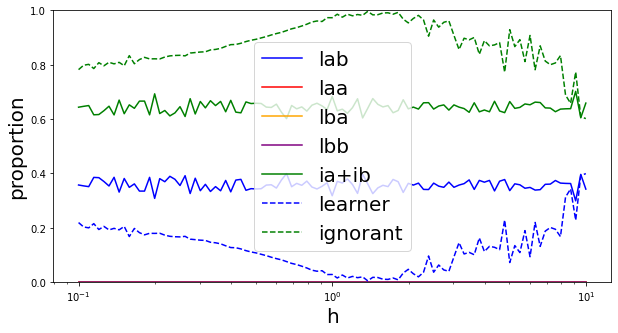

In [10]:
for i, param in enumerate(Param):
    Final_complete = np.zeros((len(Range[i]), 7))
    Final_simplified = np.zeros((len(Range[i]), 2))
    for j, value in enumerate(Range[i]):
        dic = dic_default.copy()
        dic[param] = value
        #print(dic)
        Dc = Dynamic(**dic, model="complete", tFinal=50)
        Dc.initialisation()
        Dc.eulerEx()
        Final_complete[j,:] = Dc.XX[-1]        
        
        Ds = Dynamic(**dic, model="simplified", tFinal=50)
        Ds.initialisation()
        Ds.eulerEx()
        Final_simplified[j,:] = Ds.XX[-1]
        
    plt.figure(figsize = (10, 5))
    if(i==0):
        plt.plot(Range[i], Final_complete[:,3], label = Dc.Strat[3], color = "blue")
        plt.plot(Range[i], Final_complete[:,2], label = Dc.Strat[2], color = "red")
        plt.plot(Range[i], Final_complete[:,4], label = Dc.Strat[4], color = "orange")
        plt.plot(Range[i], Final_complete[:,5], label = Dc.Strat[5], color = "purple")
        plt.plot(Range[i], Final_complete[:,0]+Final_complete[:,1], label = Dc.Strat[0]+"+"+Dc.Strat[1], color = "green")

        plt.plot(Range[i], Final_simplified[:,1], "b--", label = Ds.Strat[1])
        plt.plot(Range[i], Final_simplified[:,0], "g--", label = Ds.Strat[0])
    else:
        plt.semilogx(Range[i], Final_complete[:,3], label = Dc.Strat[3], color = "blue")
        plt.semilogx(Range[i], Final_complete[:,2], label = Dc.Strat[2], color = "red")
        plt.semilogx(Range[i], Final_complete[:,4], label = Dc.Strat[4], color = "orange")
        plt.semilogx(Range[i], Final_complete[:,5], label = Dc.Strat[5], color = "purple")
        plt.semilogx(Range[i], Final_complete[:,0]+Final_complete[:,1], label = Dc.Strat[0]+"+"+Dc.Strat[1], color = "green")

        plt.semilogx(Range[i], Final_simplified[:,1], "b--", label = Ds.Strat[1])
        plt.semilogx(Range[i], Final_simplified[:,0], "g--", label = Ds.Strat[0])

    plt.legend(fontsize = 20)
    plt.xlabel(param, fontsize = "20")
    plt.ylabel("proportion", fontsize = "20")
    plt.ylim(0,1)
    plt.show()

## Parameter exploration

In [11]:
C_range = np.logspace(-1, 5, 501)
nbrePoint = 50
Xf = np.zeros((len(C_range), nbrePoint, 2)) # replace 2 by 7 if model complete
Sigma = np.zeros((len(C_range), nbrePoint))
for i,c in enumerate(C_range):
    for j in range(nbrePoint):
        alpha = np.random.rand(1)[0]
        l, h = np.sort(np.random.exponential(2, size=2))
        D = Dynamic(h=h, l=l, alpha=alpha, c=c, model="simplified", tFinal=50)
        D.initialisation()
        D.eulerEx()
        Xf[i,j,:] = D.XX[-1]
        Sigma[i,j] = (alpha*(1-alpha))**0.5*np.abs(h-l)

<string>:131: RuntimeWarning: overflow encountered in double_scalars
<string>:123: RuntimeWarning: invalid value encountered in double_scalars
<string>:65: RuntimeWarning: invalid value encountered in double_scalars
<string>:123: RuntimeWarning: overflow encountered in double_scalars


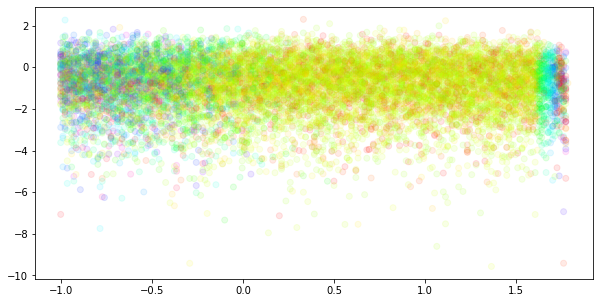

In [12]:
plt.figure(figsize=(10, 5))
for j in range(nbrePoint):
    plt.scatter(np.log10(C_range), np.log(Sigma[:,j]), c=Xf[:,j,1]/(Xf[:,j,0] + Xf[:,j,1]), cmap='hsv', alpha=0.1)
#plt.xticks(np.log10(C_range[::10]))
plt.show()

###### sans log

In [13]:
C_range = np.linspace(0, 1.5, 501)
nbrePoint = 50
Xf = np.zeros((len(C_range), nbrePoint, 2)) # replace 2 by 7 if model complete
Sigma = np.zeros((len(C_range), nbrePoint))
for i,c in enumerate(C_range):
    for j in range(nbrePoint):
        alpha = np.random.rand(1)[0]
        l, h = np.sort(np.random.exponential(2, size=2))
        D = Dynamic(h=h, l=l, alpha=alpha, c=c, model="simplified", tFinal=50)
        D.initialisation()
        D.eulerEx()
        Xf[i,j,:] = D.XX[-1]
        Sigma[i,j] = (alpha*(1-alpha))**0.5*np.abs(h-l)

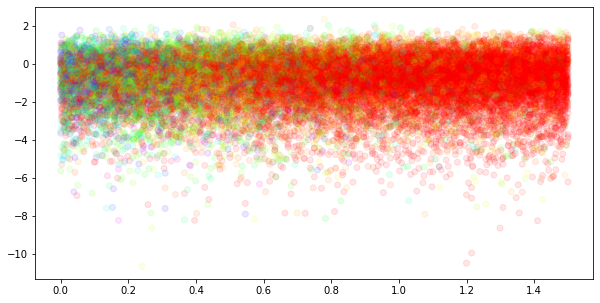

In [14]:
plt.figure(figsize=(10, 5))
for j in range(nbrePoint):
    plt.scatter(C_range, np.log(Sigma[:,j]), c=Xf[:,j,1]/(Xf[:,j,0] + Xf[:,j,1]), cmap='hsv', alpha=0.1)
#plt.xticks(np.log10(C_range[::10]))
plt.show()